<a href="https://colab.research.google.com/github/alwiyahya99/MachineLearning/blob/main/3_Membuat_Model_untuk_Klasifikasi_Banyak_Kelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Membuat Dan Melatih Model NN Dengan Tensorflow Dan Keras : Membuat Model untuk Klasifikasi Banyak Kelas**

## **1. IMPORT LIBRARY DAN PANGGIL DATASET**

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [7]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## **2. MEMPROSES DATASET**

In [8]:
# menghapus kolom yang tidak diperlukan
df = df.drop(columns='Id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


kita perlu melakukan one hot encoding karena label kita merupakan data kategorikal. Fungsi get_dummies() memudahkan kita untuk melakukan hal ini

In [9]:
# Melakukan One Hot Encoding
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


kita perlu menggabungkan kolom hasil one hot encoding dan membuang kolom spesies karena kolom tersebut tidak akan dipakai.

In [10]:
# menggabungkan tabel df dan category
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


konversi dataframe tersebut menjadi numpy array dengan fungsi values dari dataframe.

In [11]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

memisahkan atribut dan label

In [12]:
# pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

lakukan normalisasi data agar data dapat dipelajari dengan baik oleh jst

In [14]:
# kemudian kita lakukan normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_Scale = min_max_scaler.fit_transform(X)
X_Scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

## **3. MEMBUAT JARINGAN SARAF TIRUAN**

Untuk arsitektur model kita kali ini menggunakan 3 buah layer. Activation function yang digunakan pada layer terakhir dipilih softmax karena activation tersebut umum dipakai untuk klasifikasi multi kelas.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_Scale, y, test_size=0.3)

In [18]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax'),
])

Model diatas tanpa menggunakan Dropout, dan Model dibawah menggunakan Dropout


Mencegah Overvitting dengan Dropout

In [25]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout


In [26]:
model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax'),
])

## **4. MENENTUKAN OPTIMIZER DAN LOSS**

In [27]:
model_2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## **5. MENTRAINING MODEL**

In [28]:
hist = model_2.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 1.1380 - accuracy: 0.4286
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0893 - accuracy: 0.4381
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0445 - accuracy: 0.4476
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0387 - accuracy: 0.4952
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9933 - accuracy: 0.5905
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9726 - accuracy: 0.6000
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9474 - accuracy: 0.6286
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9505 - accuracy: 0.5905
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9067 - accuracy: 0.6762
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8842 - accuracy: 0.6857
Epoch 11/100
4/4 [===========

## **6. UJI AKURASI MODEL**

In [29]:
model_2.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.1569 - accuracy: 0.9556


[0.1569095104932785, 0.9555555582046509]

## **7. PLOT AKURASI**

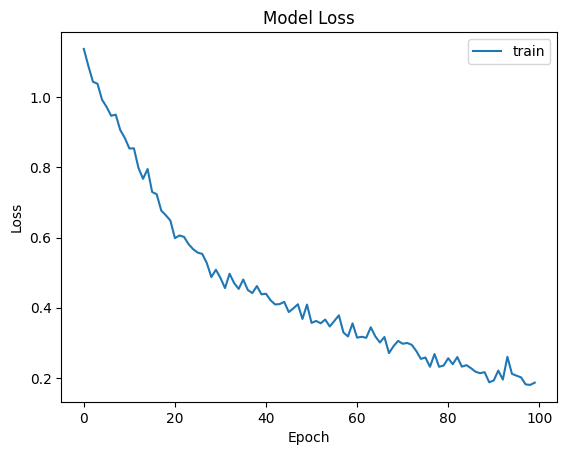

In [30]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show()

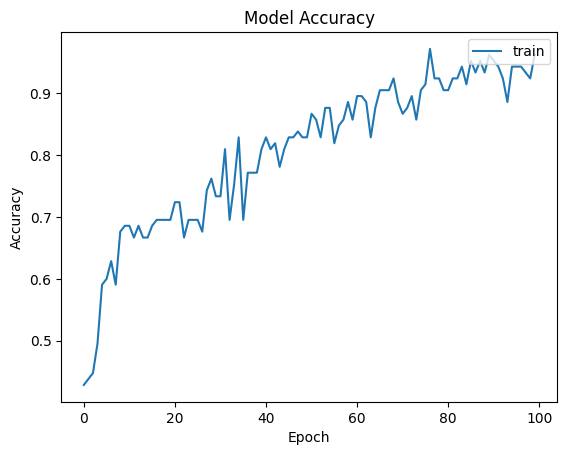

In [31]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show()